# Notebook zu Blatt 8

In [9]:
%pip install numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [11]:
import PythonSorting

In [12]:
array = [7,5,8,1] 
PythonSorting.selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [13]:
array = [7,5,8,1] 
PythonSorting.quickSort(array)
print(array) # das sortierte array

# NOTE: While this call of quickSort does not sort the array, for a reason unknown to us,
# the call of quickSort with the same input array in `PythonTest.py` does output the expected array of [1,5,7,8].

[7, 5, 8, 1]


#### 2. Choice of pivot element
The `pivot element`, in quicksort, determines how the input array is going to be `split up` into three arrays. One contains all elements that are strictly `smaller` that the pivot element, another, all that are `equal` to the pivot element and the last, all elements, that are strictly `larger` than the pivot element. The quicksort algorithm is recusivly called on the larger and smaller array. The result is then concatenated with both quicksort calls and the equal array inbetween. The quicksort algorithm stops, when only one or no element is contained in the input array.
In our implementation, the pivot element is chosen `randomly` as an element from the imput array.

#### 3. Worst case inputs
Imputs for `worst-case` running time of the implemented versions of selection sort and qicksort:
- `Selection sort:` As discussed in the lecture, for all possible input cases, they `all share the same asymptotic running time`: O(n^2). This is because the algorithm does not handle unsorted arrays any different than sorted or partially sorted inputs.
- `Quicksort:` The asymtotic worst-case running time presents itselfe, when, by chance, the largest or smallest element of the input array is always chosen as pivot throughout all recursive calls. In the case, that all elements are also distinct, we end up only reducing the size of the unsorted-array by 1 each recursive call, which leads us to a worts-case running time of O(n^2).  

#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

All tests for `selection sort` and `quicksort` can be found in: `PythonTests.py`.
The tests are executable via python-commandline (python shell) with following command:
`python -m unittest -v PythonTests.py` (one of may possible ones).

#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [14]:
s_times, q_times = [], []
array_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    
    # getting time for selection sort
    start = time.time()
    PythonSorting.selectionSort(array)  # sorting the array via selection sort
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    # getting time for quicksort
    start = time.time()
    PythonSorting.quickSort(array)  # sorting the array via quicksort
    end = time.time()
    q_times.append(end-start) # die zeit in sekunden

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

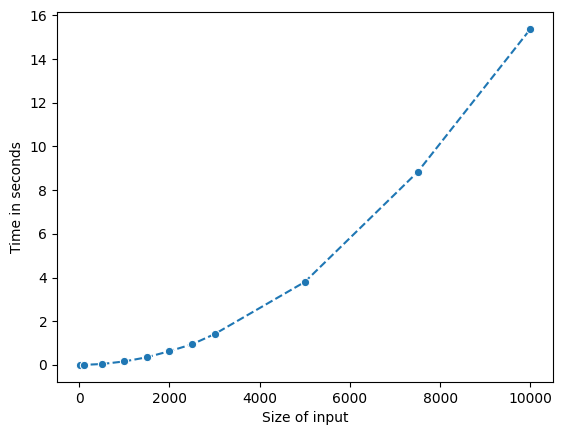

In [15]:
import matplotlib.pyplot as plt

# Plot for selection sort
x = array_sizes
y = s_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

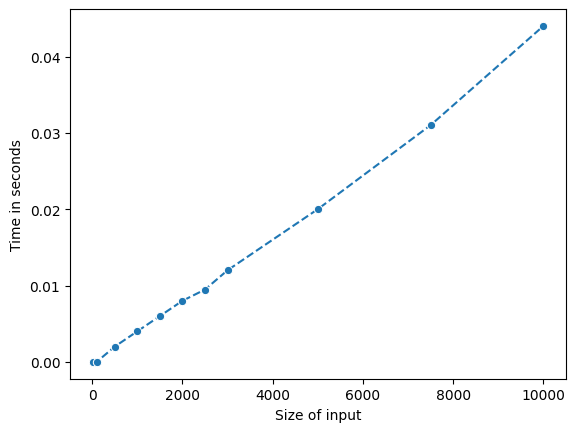

In [16]:
# Plot for qucksort
x = array_sizes
y = q_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

First we need to appoint a cost for each operation, before estimating the `constants`:

Lets say that all the following operations cost `1 time unit`: comparisons, variable/ list initialisations and reassignments, calls of external methods and returns.
Now we can approximate:
- `Selection sort`: For each element n, we call in total n/2 times: one comparison and, lets say half of the time its nececcary to swap elements, means one initialisation and three reassignments. We also need to initialize i and j for the two for loops and add one for the return. => n*(n/2)*(1+(1+1+1)/2)+1 = `n*(n/2)*2.5 + 1`

- `Quicksort`: In the beginning of every quicksort call, we check if the input array is empty or contains only one element. This is n times the case for one element (=> n * 2) and at most n times the case for empty plus the comparison (=> n * 3). If neither is the case (still +2 comparisions), we then initailize three variables alongside two external method calls as well as three list initialisations. Below that, there is a for loop (initialize i), with a total of n cycles for every quicksort iteration. This loop containes three comparisons, which can be averaged out as 1.5 comparisons and all of them trigger one arrayfield reassignment. In the very end there is one return statement, in which a external method is called, as well as three list assignments are made. Assume that we allways get lucky when choosing a pivot element, i.e arrMinus and arrPlus both contain roughly inputArray/2, which results in approximatly log(n) recursive calls of quicksort.
All in all this results in: n * 2 + n * 3 + n * log(n) * (2 + 3+2+3+ 1.5+1 +1+1+3) = `5 * n + 17.5 * n * log(n)`.

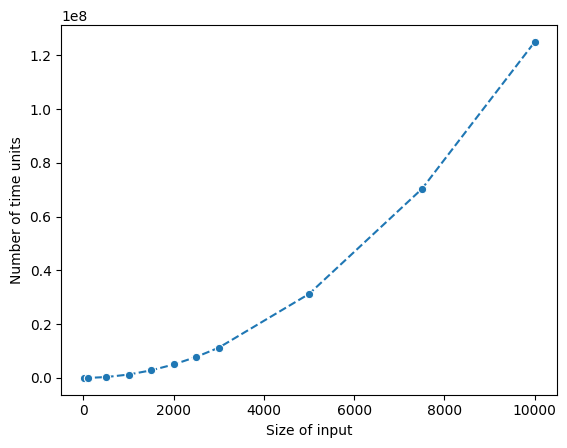

In [17]:
# Plot for selection sort
# approximated by: n*(n/2)*2.5+1    => C = 2.5
def approximation(n):
    return n*(n/2)*2.5+1

x = array_sizes
y = map(approximation, x)
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Number of time units")
plt.show()

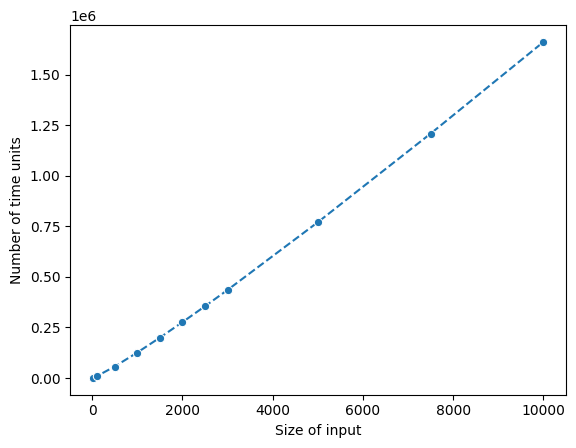

In [18]:
import math

# Plot for quicksort
# approximated by: 5 * n + 17.5 * n * log(n)    => C1 = 5 for n , and C2 = 17.5 for n * log(n)
def approximation(n):
    return 5*n+ 17.5*n*math.log(n)

x = array_sizes
y = map(approximation, x)
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Number of time units")
plt.show()

#### 8. Laufzeiten der Java implementierung von selection sort und quicksort.  

In [19]:
# The following values have been determined by running the `getRunningTime()` method for `JavaSorting`.
# The tests and reunning times can be accessed by calling `java JavaSort.java` in a console
# Also note, that a different input array was used on the java algorithms than for their python counterparts.  
j_s_times = [1.7E-6, 1.112E-4, 0.0013267, 7.484000000000001E-4, 0.0011941, 0.0019517000000000002, 0.002945, 0.0048086000000000005, 0.0114608, 0.0301259, 0.0616265]
j_q_times = [2.29E-5, 2.718E-4, 0.0012833, 9.052000000000001E-4, 0.0013695, 0.0015908, 0.0017382, 0.0031963, 0.0035544, 0.0057403, 0.008687700000000001]

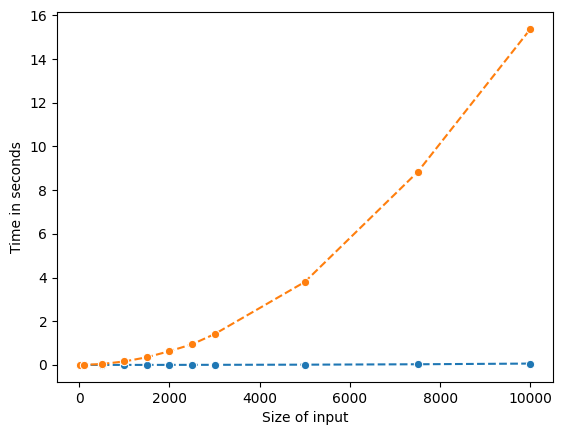

In [25]:
# Plot for java-/ python selcetion sort comparison
x = array_sizes
sns.lineplot(x = x, y = j_s_times, linestyle="dashed", marker="o")  # BLUE: java selcetion sort times
sns.lineplot(x = x, y = s_times, linestyle="dashed", marker="o")    # ORANGE: python selection sort times
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

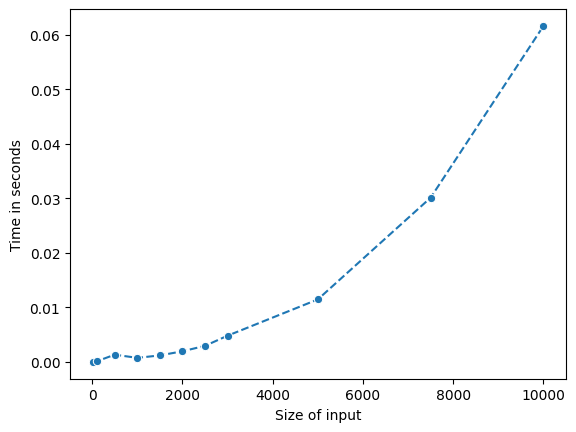

In [26]:
# Plot for java- selcetion sort 
x = array_sizes
sns.lineplot(x = x, y = j_s_times, linestyle="dashed", marker="o")  # java selcetion sort times
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

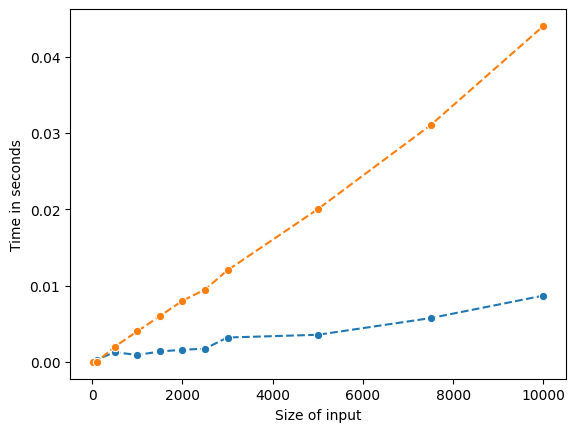

In [27]:
# Plot for java-/python- quicksort comparison
x = array_sizes
sns.lineplot(x = x, y = j_q_times, linestyle="dashed", marker="o")  # BLUE: java selcetion sort times
sns.lineplot(x = x, y = q_times, linestyle="dashed", marker="o")    # ORANGE: python selection sort times 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

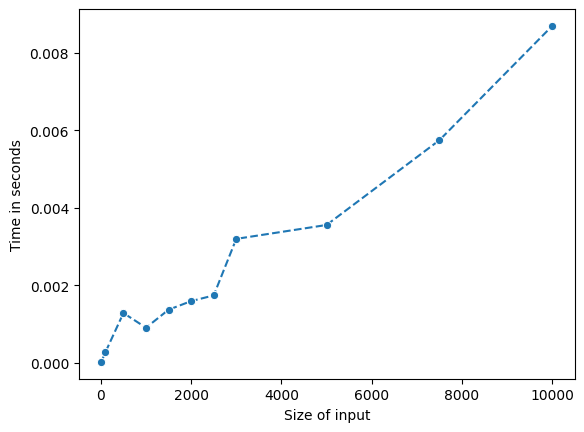

In [28]:
# Plot for java-quicksort 
x = array_sizes
sns.lineplot(x = x, y = j_q_times, linestyle="dashed", marker="o")  # BLUE: java selcetion sort times 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

##### Rough analysis: 
- For selection sort: the java implementation is `~266` times faster.
- For quicksort: the java implementation is `~5` times faster.

Selection sort, being more inefficient than quicksort in their implementation, experienced a far grater decrease in running time, than the already quite efficient quicksort.

#### 9. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

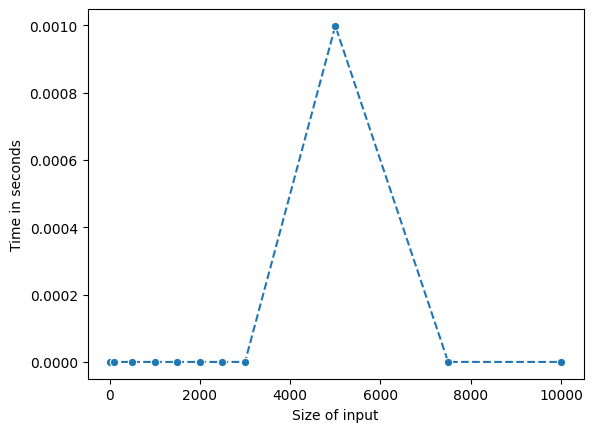

In [23]:
# the random array initialisation has been copyed here, in order to
# allow for quick refreshing of the running times of .sort()
native_times = []
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    
    # getting time for the native .sort() function
    start = time.time()
    array.sort()    # sorting the array via native .sort() function
    end = time.time()
    native_times.append(end-start) # die zeit in sekunden

# Plot for the native .sort() function
x = array_sizes
y = native_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()


##### Analysis:
Except for the occasional spike, the running time is seemingly, `not or only insegnificantly greater than 0` for all array lengths.

The spikes might be explained by secondary processes, that are linked to the sorting process, but don't directly take part in. It's position is also random, i.e everytime the `naive_times` are taken anew, their number(0-2) and location changes.

More surprisingly: the running time for each array length seem to be `equal to 0` (observe a case with no spizes), which seems impossible, considering what we have learned in the lecture so far. This leads to think, that something is wrong with our implementation, which we are unable to find.

#### 10. Language choice and running time factor
Judging from the results of tasks 5 and 8, we can conclude that the choice of programming language determines a factor of (in this case) `roughly 5 up to 266`  when it comes to running time, based on their initial efficiency
.

The quotient of the two longest running times in task 5 and 8:
- Selection sort: 16 / 0.06 = 266.66... 
- Quicksort: 0.4 / 0.08 = 5